# 必要なモジュールのインポート


In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop


Using TensorFlow backend.


# 前処理

## テストデータの取得
Kerasが提供してくれている手書き数字文字を取得します。

* x_train : 訓練用のデータ
* y_train : 訓練用のデータのラベル
* x_test : テスト用のデータ
* y_test : テスト用のデータのラベル


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## テストデータの内容確認①
x_train,x_testは、それぞれ3次元の配列で渡されます。<br>
x_trainは60000枚の28px*28pxの画像、x_testは10000枚の28px*28pxの画像。<br>
x_train,x_testの配列がどのような形をしているか、確認してみます。

In [3]:
# 内容確認。ここは書かなくてOKです
print("x_trainの形:{}".format(x_train.shape))
print("x_testの形:{}".format(x_test.shape))

x_trainの形:(60000, 28, 28)
x_testの形:(10000, 28, 28)


## テストデータの整形
ニューラルネットワークの入力層にするには、データを1次元にする必要があります。<br>
x_train,x_testをそれぞれ、60000枚×1次元784pxの画像に変換します。<br>

Kerasは単精度浮動小数点(float32)で演算を行うので、Kerasに合わせてテストデータの型を変換します。おまじないです。<br>

また、「データの正規化」を行います。<br>
データを正規化(平均0,標準偏差1)になるよう変換することで、データの値のばらつきが小さくなり学習が早くなります。<br>
本来はBatch Normalizationなどを使って正規化します。<br>


In [4]:
x_train = x_train.reshape(60000, 784) # [60000][28][28] -> [60000][784]に変換
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # テストデータの型をfloat32に変換
x_test = x_test.astype('float32')

# データの簡易的な正規化。
x_train = x_train / 255 
x_test = x_test / 255

## テストデータの内容確認②

少しイメージがつかみにくいと思うので、x_trainの中身を覗いてみます。<br>

x_train[n][0] 〜 x_train[n][783] が1枚の画像データの集まりです。<br>

試しに、<br>
・x_train[0][0] 〜 x_train[0][783]<br>
・x_train[1][0] 〜 x_train[1][783]<br>
・x_train[2][0] 〜 x_train[2][783]<br>
のデータを表示してみます。<br>


********************************
x_train[0]のデータ
********************************

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 003 018 018 018 126 136 175 026 166 255 247 127 000 000 000 000 
000 000 000 000 000 000 000 000 030 036 094 154 170 253 253 253 253 253 225 172 253 242 195 064 000 000 000 000 
000 000 000 000 000 000 000 049 238 253 253 253 253 253 253 253 253 251 093 082 082 056 039 000 000 000 000 000 
000 000 000 00

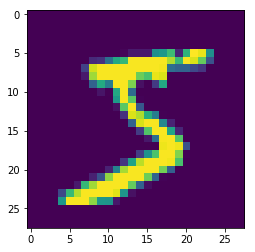

********************************
x_train[1]のデータ
********************************

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 051 159 253 159 050 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 048 238 252 252 252 237 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 054 227 253 252 239 233 252 057 006 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 010 060 224 252 253 252 202 084 252 253 122 000 000 000 000 000 000 
000 000 000 00

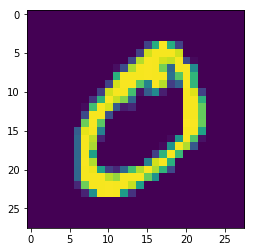

********************************
x_train[2]のデータ
********************************

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 067 232 039 000 000 000 000 000 
000 000 000 000 062 081 000 000 000 000 000 000 000 000 000 000 000 000 000 000 120 180 039 000 000 000 000 000 
000 000 000 000 126 163 000 000 000 000 000 000 000 000 000 000 000 000 000 002 153 210 040 000 000 000 000 000 
000 000 000 00

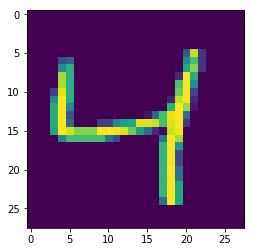

In [5]:
# 内容確認。ここは書かなくてOKです
import numpy as np
import matplotlib.pyplot as plt

for i in range(3):
    print("********************************")
    print("x_train[{}]のデータ".format(i))
    print("********************************\n")
    
    for j in range(28):
        w_str = ""
        for k in range(28):
            w_str2 = "{0:03d} ".format(int(x_train[i][28 * j + k] * 255))
            w_str = w_str + w_str2 
        print(w_str)
    print("\n")
    img_px = x_train[i].reshape(28,28) * 255
    plt.imshow(img_px)
    plt.show()

## 教師ラベルの内容確認①
続いて、y_trainとy_testの内容を確認してみます。

In [6]:
#############################################
# 内容確認。ここは書かなくてOKです。
#############################################
print("y_trainの形:{}".format(y_train.shape))
print("y_train:{}".format(y_train))
print("y_testの形:{}".format(y_test.shape))
print("y_test:{}".format(y_test))

y_trainの形:(60000,)
y_train:[5 0 4 ..., 5 6 8]
y_testの形:(10000,)
y_test:[7 2 1 ..., 4 5 6]


## 教師ラベルの整形
出力層のノード数は10です。<br>
今は60000×1次元ですが、これを60000×10次元に変換します。<br>
具体的には、以下のようになります。<br>

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]<br>
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]<br>
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]<br>
.<br>
.<br>
.<br>
9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]<br>

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 教師ラベルの内容確認②
変換後の内容を確認してみましょう

In [8]:
#############################################
# 内容確認。ここは書かなくてOKです。
#############################################
print("y_trainの形:{}".format(y_train.shape))
print("y_train:{}".format(y_train))
print("y_testの形:{}".format(y_test.shape))
print("y_test:{}".format(y_test))

y_trainの形:(60000, 10)
y_train:[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
y_testの形:(10000, 10)
y_test:[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


# ニューラルネットワーク

## ニューラルネットワークの実装①

以下の手順で行います<br>
* 1.初期化
    * model = Sequential()
* 2.最初の隠れ層を定義
    * model.add(Dense(ノード数, activation=活性化関数の名前), input_shape=(入力層の数,))
* 3.隠れ層を重ねていく…
    * model.add(Dense(ノード数, activation=活性化関数の名前))
* 4.出力層を定義
    * model.add(Dense(出力層のノード数, activation=出力層の活性化関数の名前))<br>
      分類の場合は、それぞれの分類の確率を出力する'softmax'と入れておいてください。

各層の間の「DropOut」は任意です。<br>
パワポの参考資料を参考にしてください。<br>

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # 隠れ層①
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) # 隠れ層②
model.add(Dropout(0.2))
# 隠れ層はいくら重ねてもOKです(その分処理時間がかかります)
# model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax')) # 出力層


## ニューラルネットワークの内容確認
model.summary()で構築したニューラルネットワークの確認ができます。<br>
今回は、入力層(784)→隠れ層(512)→隠れ層(512)→出力層(10)で構築しました。<br>
入力層以降のニューラルネットワークの定義が出力されます。

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## ニューラルネットワークの実装②

最後に、以下を設定します
* 損失関数
* 最適化アルゴリズム
* 評価方法


In [11]:
model.compile(loss='categorical_crossentropy', # 損失関数=クロスエントロピー
              optimizer=RMSprop(),             # 最適化アルゴリズムはRMSprop
              metrics=['accuracy'])            # 評価方法は正解率(accuracy)

## ニューラルネットワークの学習
model.fitで学習を進めます。<br>
引数の説明<br>
* x_train : 訓練データ
* y_train : 訓練データの教師ラベル
* batch_size : 重み・バイアス更新１回あたりのデータ数
* epochs : 訓練データを何回学習させるか
* varbose : ログ出力方法 0:出力なし 1:プログレスバーで出力 2:普通に出力
* validation_data : 性能を測るためのテストデータ

出力されるテストの結果<br>
* loss: 訓練データを入力したときの損失関数の値(小さくなっていく=学習が進んでいる)
* acc: 訓練データでの正解率
* val_loss: テストデータを入力したときの損失関数の値(小さくなっていく=学習が進んでいる)
* val_acc: テストデータでの正解率
※x_trainをさらにテストデータ、訓練データに分けています


In [12]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s - loss: 0.2444 - acc: 0.9252 - val_loss: 0.1170 - val_acc: 0.9644
Epoch 2/20
60000/60000 [==============================] - 9s - loss: 0.1027 - acc: 0.9686 - val_loss: 0.0900 - val_acc: 0.9738
Epoch 3/20
60000/60000 [==============================] - 9s - loss: 0.0743 - acc: 0.9782 - val_loss: 0.0885 - val_acc: 0.9774
Epoch 4/20
60000/60000 [==============================] - 9s - loss: 0.0607 - acc: 0.9819 - val_loss: 0.0728 - val_acc: 0.9797
Epoch 5/20
60000/60000 [==============================] - 9s - loss: 0.0514 - acc: 0.9848 - val_loss: 0.0838 - val_acc: 0.9788
Epoch 6/20
60000/60000 [==============================] - 9s - loss: 0.0430 - acc: 0.9871 - val_loss: 0.0843 - val_acc: 0.9786
Epoch 7/20
60000/60000 [==============================] - 9s - loss: 0.0387 - acc: 0.9886 - val_loss: 0.0888 - val_acc: 0.9797
Epoch 8/20
60000/60000 [==============================] - 9s 

## ニューラルネットワークの推論
テストデータを使って、学習したニューラルネットワークの精度を確認します。<br>

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)

## ニューラルネットワークの推論（本当にあってるのか確認）
本当にあっているのか確認します。<br>

********************************
x_test[0]のデータ
********************************

NNの予想は:[7]
画像は...


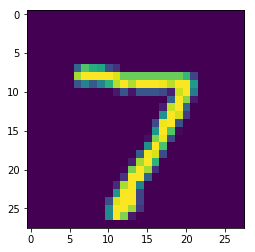

********************************
x_test[1]のデータ
********************************

NNの予想は:[2]
画像は...


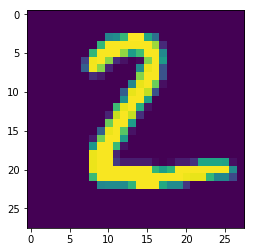

********************************
x_test[2]のデータ
********************************

NNの予想は:[1]
画像は...


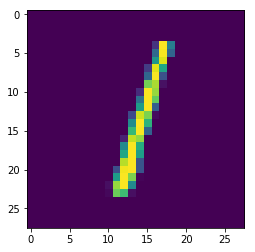

In [14]:
#############################################
# 内容確認。ここは書かなくてOKです。
#############################################

for i in range(3):
    print("********************************")
    print("x_test[{}]のデータ".format(i))
    print("********************************\n")
    
    # 入力データを推論
    pred = model.predict_classes(x_test[i].reshape(1,-1), batch_size=1, verbose=0)
    print("NNの予想は:{}".format(pred))

    # 画面表示
    print("画像は...")
    img_px = x_test[i].reshape(28,28)
    plt.imshow(img_px)
    plt.show()